In [131]:
import pandas as pd
from pymongo import MongoClient
conn = "mongodb://127.0.0.1:27017/"
client = MongoClient(conn)
database = client["project_bdnsql"]
data = database["Healthcare-Diabetes"]

## Functions

In [ ]:
import json

def jsonFormater(data, limit=None):
    if limit is not None:
        data = data[:limit]
    return json.dumps(data, indent=2, default=str, ensure_ascii=False)

def getDocumentPd(ascending:bool,limit:int):
    df = getDf()
    df_sorted = df.sort_values(by='Id',ascending=ascending)
    return df_sorted if not limit else df_sorted.head(limit)

def getDocument(limit=None):
    docs = list(data.find())
    if limit is not None:
        docs = docs[:limit]
    return jsonFormater(docs)

def getDf(): 
    df = pd.DataFrame(list(data.find()))
    return df   

## 3. Implemente os métodos para inserir, editar, buscar e excluir, sendo:

### a. apresente a coleção ou coleções existente(s) no banco de dados.

Esse script mostra os 10 primeiros documentos em ordem do menor para o maior.

In [168]:
getDocumentPd(True, 10)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,684996d8c636c293a97eac8f,1,6,148,72,35,0,33.6,0.627,50,1
17,684996d8c636c293a97eac9e,2,1,85,66,29,0,26.6,0.351,31,0
0,684996d8c636c293a97eac8d,3,8,183,64,0,0,23.3,0.672,32,1
19,684996d8c636c293a97eaca0,4,1,89,66,23,94,28.1,0.167,21,0
1,684996d8c636c293a97eac8e,5,0,137,40,35,168,43.1,2.288,33,1
3,684996d8c636c293a97eac90,6,5,116,74,0,0,25.6,0.201,30,0
4,684996d8c636c293a97eac91,7,3,78,50,32,88,31.0,0.248,26,1
5,684996d8c636c293a97eac92,8,10,115,0,0,0,35.3,0.134,29,0
6,684996d8c636c293a97eac93,9,2,197,70,45,543,30.5,0.158,53,1
7,684996d8c636c293a97eac94,10,8,125,96,0,0,0.0,0.232,54,1


### b. em cada coleção, insira 5 documentos de dados extras.

In [141]:
import random

last = data.find_one(sort=[("Id", -1)])
next_id = last['Id'] + 1 if last and "Id" in last  else 1

objects = []
for i in range(5):
    objects.append({
        "Id": next_id + i,
        "Pregnancies": random.randint(0, 10),
        "Glucose": random.randint(70, 200),
        "BloodPressure": random.randint(50, 120),
        "SkinThickness": random.randint(10, 50),
        "Insulin": random.randint(15, 300),
        "BMI": round(random.uniform(18.0, 45.0), 1),
        "DiabetesPedigreeFunction": round(random.uniform(0.1, 2.5), 2),
        "Age": random.randint(18, 80),
        "Outcome": random.randint(0, 1)
    })

data.insert_many(objects)
getDocumentPd(False, 5)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2772,685db69c58995f4c21d71f5d,2773,4,99,120,29,120,18.6,1.20,18,1
2771,685db69c58995f4c21d71f5c,2772,7,177,116,45,142,29.2,2.35,60,0
2770,685db69c58995f4c21d71f5b,2771,0,176,109,34,194,32.8,1.38,66,0
2769,685db69c58995f4c21d71f5a,2770,4,168,110,17,74,34.7,0.62,48,0
2768,685db69c58995f4c21d71f59,2769,9,70,75,50,164,24.9,1.53,34,1


### c. editar 2 opções diferentes de dados (independente do documento) .

In [135]:
data.update_one(
    {"Id": last['Id']},  
    {"$set": {"Glucose": 180, "Age": 40}}
)

data.update_one(
    {"Id": last['Id'] - 1},  
    {"$set": {"Glucose": 150, "Outcome": 1}}
)

UpdateResult({'n': 1, 'nModified': 0, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [136]:
getDocumentPd(False, 2)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2772,685db66f58995f4c21d71f58,2773,3,186,50,23,105,40.0,0.83,66,1
2771,685db66f58995f4c21d71f57,2772,7,167,86,15,250,31.3,2.17,57,1


### d. permita realizar a busca por todos os documentos de cada coleção.

In [137]:
print(getDocument(5))


[
  {
    "_id": "684996d8c636c293a97eac8d",
    "Id": 3,
    "Pregnancies": 8,
    "Glucose": 183,
    "BloodPressure": 64,
    "SkinThickness": 0,
    "Insulin": 0,
    "BMI": 23.3,
    "DiabetesPedigreeFunction": 0.672,
    "Age": 32,
    "Outcome": 1
  },
  {
    "_id": "684996d8c636c293a97eac8e",
    "Id": 5,
    "Pregnancies": 0,
    "Glucose": 137,
    "BloodPressure": 40,
    "SkinThickness": 35,
    "Insulin": 168,
    "BMI": 43.1,
    "DiabetesPedigreeFunction": 2.288,
    "Age": 33,
    "Outcome": 1
  },
  {
    "_id": "684996d8c636c293a97eac8f",
    "Id": 1,
    "Pregnancies": 6,
    "Glucose": 148,
    "BloodPressure": 72,
    "SkinThickness": 35,
    "Insulin": 0,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 0.627,
    "Age": 50,
    "Outcome": 1
  },
  {
    "_id": "684996d8c636c293a97eac90",
    "Id": 6,
    "Pregnancies": 5,
    "Glucose": 116,
    "BloodPressure": 74,
    "SkinThickness": 0,
    "Insulin": 0,
    "BMI": 25.6,
    "DiabetesPedigreeFunction": 0.201,

### e. exclua 2 documentos em cada coleção.
*Obs: excluo os 5 últimos que acabei de adicionar.*

In [138]:
ids_to_delete = [obj['Id'] for obj in objects]
data.delete_many({"Id": {"$in": ids_to_delete}})
getDocumentPd(False, 5)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,684996d8c636c293a97eb758,2768,2,180,72,15,76,30.1,0.547,40,0
2762,684996d8c636c293a97eb757,2767,0,150,110,46,130,67.1,0.319,26,1
2761,684996d8c636c293a97eb756,2766,6,85,78,0,0,31.2,0.382,42,0
2765,684996d8c636c293a97eb75a,2765,8,179,72,42,130,32.7,0.719,36,1
2755,684996d8c636c293a97eb750,2764,2,75,64,24,55,29.7,0.370,33,0


## 4. Permita o uso de pelo menos 2 buscas utilizando diferentes operadores:

**high_glucose**: *busca todos os documentos com Glucose maior que 150* 

**outcome_or_young**: *Busca todos os pacientes com diabetes (Outcome == 1) e idade menor que 30*

In [139]:
high_glucose = list(data.find({"Glucose": {"$gt": 150}}))
print("Pacientes com Glicose > 150:", jsonFormater(high_glucose,2))

diabetes_young = list(data.find({
    "Outcome": 1,
    "Age": {"$lt": 30}
}))
print("Pacientes com diabetes e idade < 30:", jsonFormater(diabetes_young, 2))

Pacientes com Glicose > 150: [
  {
    "_id": "684996d8c636c293a97eac8d",
    "Id": 3,
    "Pregnancies": 8,
    "Glucose": 183,
    "BloodPressure": 64,
    "SkinThickness": 0,
    "Insulin": 0,
    "BMI": 23.3,
    "DiabetesPedigreeFunction": 0.672,
    "Age": 32,
    "Outcome": 1
  },
  {
    "_id": "684996d8c636c293a97eac93",
    "Id": 9,
    "Pregnancies": 2,
    "Glucose": 197,
    "BloodPressure": 70,
    "SkinThickness": 45,
    "Insulin": 543,
    "BMI": 30.5,
    "DiabetesPedigreeFunction": 0.158,
    "Age": 53,
    "Outcome": 1
  }
]
Pacientes com diabetes e idade < 30: [
  {
    "_id": "684996d8c636c293a97eac91",
    "Id": 7,
    "Pregnancies": 3,
    "Glucose": 78,
    "BloodPressure": 50,
    "SkinThickness": 32,
    "Insulin": 88,
    "BMI": 31,
    "DiabetesPedigreeFunction": 0.248,
    "Age": 26,
    "Outcome": 1
  },
  {
    "_id": "684996d8c636c293a97eaca5",
    "Id": 24,
    "Pregnancies": 9,
    "Glucose": 119,
    "BloodPressure": 80,
    "SkinThickness": 35,
    

## 5. Permita o uso de pelo menos 2 buscas utilizando diferentes funções de agregação.

**avg_glucose_by_outcome**: *Média de Glucose para cada grupo de Outcome* 

**age_stats_by_outcome**: *Máximo e mínimo de Age para cada grupo de Outcome*

In [164]:
avg_glucose_by_outcome = list(data.aggregate([
    {"$group": {"_id": "$Outcome", "avg_glucose": {"$avg": "$Glucose"}}},
    {
        "$addFields": {
            "group": {
                "$cond": {
                    "if": {"$eq": ["$_id", 1]},
                    "then": "Tem Diabetes",
                    "else": "Não Tem Diabetes"
                }
            }
        }
    }
]))

print("Média de Glicose por grupo de Outcome:", jsonFormater(avg_glucose_by_outcome))

age_stats_by_outcome = list(data.aggregate([
    {
        "$group": {
            "_id": "$Outcome",
            "max_age": {"$max": "$Age"},
            "min_age": {"$min": "$Age"}
        }
    },
    {
        "$addFields": {
            "group": {
                "$cond": {
                    "if": {"$eq": ["$_id", 1]},
                    "then": "Tem Diabetes",
                    "else": "Não Tem Diabetes"
                }
            }
        }
    }
]))

print("Máxima e mínima idade por grupo de Outcome:", jsonFormater(age_stats_by_outcome))

Média de Glicose por grupo de Outcome: [
  {
    "_id": 1,
    "avg_glucose": 141.38364779874215,
    "group": "Tem Diabetes"
  },
  {
    "_id": 0,
    "avg_glucose": 110.5783397471138,
    "group": "Não Tem Diabetes"
  }
]
Máxima e mínima idade por grupo de Outcome: [
  {
    "_id": 1,
    "max_age": 70,
    "min_age": 18,
    "group": "Tem Diabetes"
  },
  {
    "_id": 0,
    "max_age": 81,
    "min_age": 21,
    "group": "Não Tem Diabetes"
  }
]


## 6. Faça uma análise exploratória dos dados via pandas e apresente:

### a. distribuição de frequência de um documento e campo

**outcome_freq**: *Distribuição de frequência do campo Outcome* 

**age_freq**: *Distribuição de frequência para faixas etárias e Outcome*

In [193]:
df = getDf()

outcome_freq = df['Outcome'].value_counts()
print("Distribuição de frequência para Outcome:")
print(outcome_freq)

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ["0 a 20", "20 a 30", "30 a 40", "40 a 50", "50 a 60", "60 a 70", "70 a 80", "80 a 100"]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)
age_freq = df.groupby(['AgeGroup', 'Outcome'], observed=False).size().unstack(fill_value=0)
print("\nDistribuição de frequência para faixas etárias e Outcome:")
print(age_freq)

Distribuição de frequência para Outcome:
Outcome
0    1819
1     954
Name: count, dtype: int64

Distribuição de frequência para faixas etárias e Outcome:
Outcome      0    1
AgeGroup           
0 a 20       0    1
20 a 30   1198  324
30 a 40    291  271
40 a 50    175  235
50 a 60     76   95
60 a 70     71   28
70 a 80      4    0
80 a 100     4    0


### b. visão geral dos tipos e métricas (avg, std, quartis, entre outros) de um documento.

In [ ]:
df = getDf()
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2773.000000  2773.000000  2773.000000    2773.000000    2773.000000   
mean   1387.000000     3.744681   121.176343      69.200865      20.849982   
std     800.640473     3.323646    32.086715      19.289650      16.064081   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     694.000000     1.000000    99.000000      64.000000       0.000000   
50%    1387.000000     3.000000   117.000000      72.000000      23.000000   
75%    2080.000000     6.000000   141.000000      80.000000      32.000000   
max    2773.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2773.000000  2773.000000               2773.000000  2773.000000   
mean     80.233682    32.130004                  0.472896    33.159394   
std     112.241472     8.074452                 

## 7. Monte 2 gráficos diferentes e apresente os dados que achar pertinente.

### Qual é a média de glicose entre pessoas com e sem diabetes?

<Axes: xlabel='Group', ylabel='Glucose'>

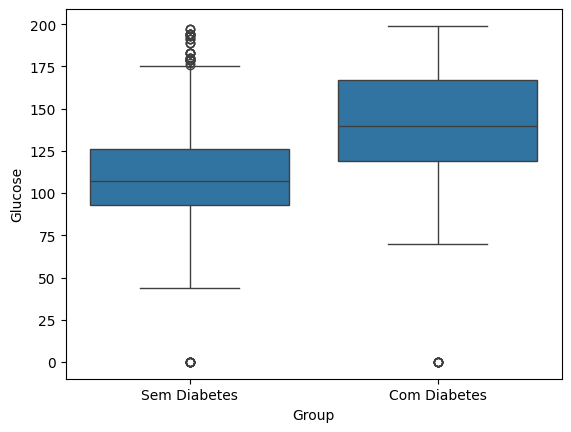

In [ ]:
import seaborn as sns

glucose_with_diabetes = df[df['Outcome'] == 1]['Glucose'] 
glucose_without_diabetes = df[df['Outcome'] == 0]['Glucose']

df_plot = pd.DataFrame({
    'Glucose': pd.concat([glucose_without_diabetes, glucose_with_diabetes]),
    'Group': ['Sem Diabetes'] * len(glucose_without_diabetes) + ['Com Diabetes'] * len(glucose_with_diabetes)
})

sns.boxplot(x='Group', y='Glucose', data=df_plot)

## Distribuição por Faixa Etária de Diabetes

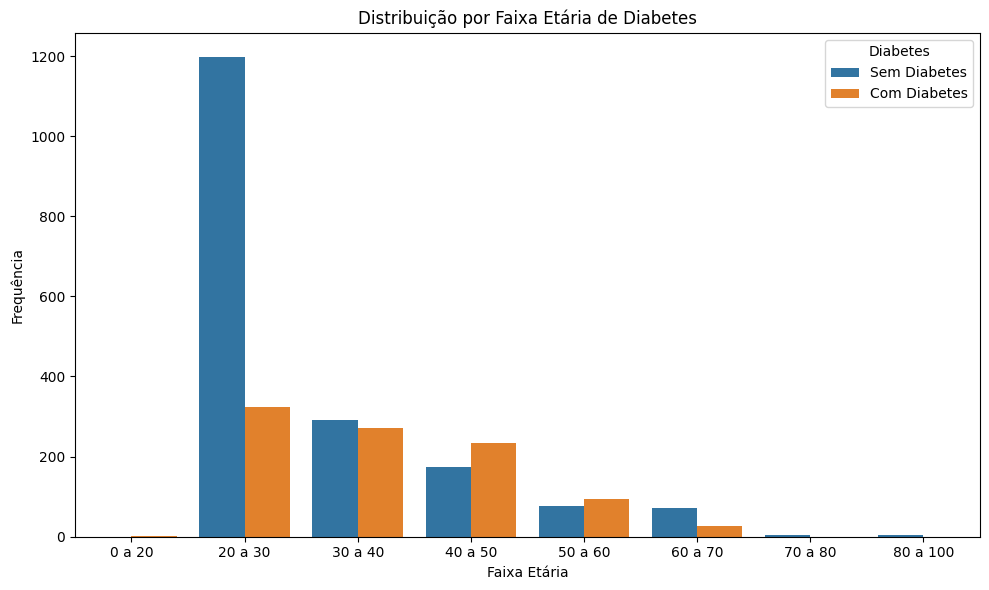

In [196]:
import matplotlib.pyplot as plt

age_freq_reset = age_freq.reset_index().melt(id_vars='AgeGroup', var_name='Outcome', value_name='Frequência')

age_freq_reset['Outcome'] = age_freq_reset['Outcome'].map({0: 'Sem Diabetes', 1: 'Com Diabetes'})

plt.figure(figsize=(10, 6))
sns.barplot(data=age_freq_reset, x='AgeGroup', y='Frequência', hue='Outcome')

plt.title('Distribuição por Faixa Etária de Diabetes')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.legend(title='Diabetes')
plt.tight_layout()
plt.show()
